In [421]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import matplotlib.pyplot as plt
from sklearn import svm
from collections import Counter 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,r2_score


In [422]:

train_sampel_data_df = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/train_sample.csv")

test_sampel_data_df = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/test_sample.csv")

train_sampel_2_data_df = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/train_sample_2.csv")

test_sampel_2_data_df = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/test_sample_2.csv")

## Data analys 

Den första dataset innehåller 5 datapunkter och 785 attributer i båda träning och testing data
men den andra innehåller samma antal datapunkter dvs 5 men i träningdata har det 782 attributer och i testingdata har det 785 attributer

In [423]:
train_sampel_data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [424]:
test_sampel_data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [425]:
train_sampel_2_data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [426]:
test_sampel_2_data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## välj dataset
Dessa dataset som vi jobbar med just nu är inte samma dataset som vi har använt tidigare efter data analyser som jag gjorde så väljer jag train_sampel dataset för att jag anser att den har bäst kvalitet eftersom om vi jämför varje dataset med träning och testingdata och kollar hur många attributer eller rader dessa har? så ser vi att dataset sampel_2 har olika attributer om man kollar på testing och träning så ser man att det har träningen 782 attributer annars i testing så har det 785 attributer och här ser vi att det finns lite fel i datan så därför väljer jag den första dataset sampel_train alltså.

### Hur många klasser finns det?

In [427]:
train_label=train_sampel_data_df['label'].unique()
print(f'Det finns {len(train_label)} klasser')

Det finns 10 klasser


## Rita ut minst en variant av varje siffra som en bild på siffran

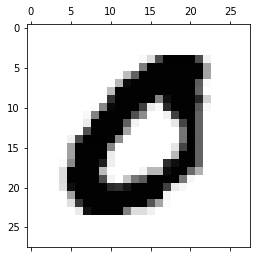

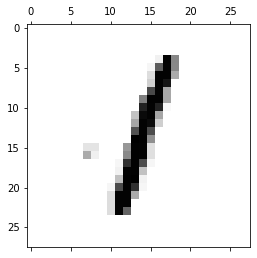

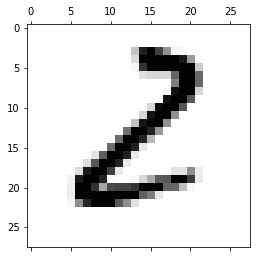

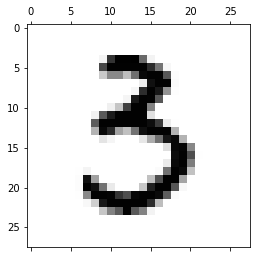

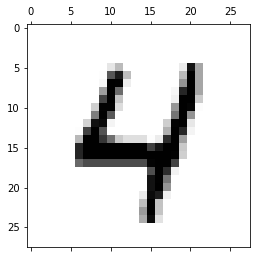

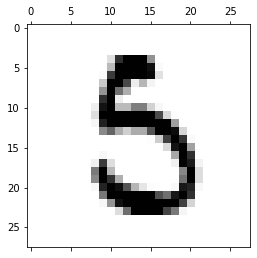

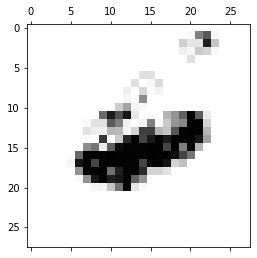

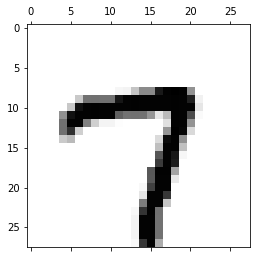

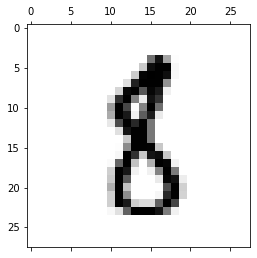

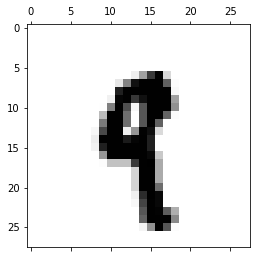

In [428]:
for i in train_label:

    bild1 = train_sampel_data_df[train_sampel_data_df['label']==i].sample()

    bild1 = bild1.drop(columns=["label"])

    skap = (28,28)

    bild = bild1.values.reshape(1,28,28)

    plt.matshow(bild[0], cmap=plt.cm.Greys)


# Träning en k-nearest neighbors modell 

In [429]:
x_train=train_sampel_data_df.drop(columns=['label'])
y_train=train_sampel_data_df.label

x_test =test_sampel_data_df.drop(columns=['label'])
y_test= test_sampel_data_df.label


### Vad har du för värde på k?

### Vad får modellen för testscore?

In [440]:

k_nub_lista=[1,2,3,4,5,10,20,30,40,50,100,200,300,1000]

for k in k_nub_lista:
    print(f'K värde är nu ***{k}***')
    neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
    test= neigh.score(x_test,y_test)
    pre= neigh.predict(x_test)
  
    print(f'Testsocre är {test}')


K värde är nu ***6***
Testsocre är 0.935


In [ ]:
närm= neigh.n_neighbors

### Skapa en confusion matrix för att se hur modellen klassificerar

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


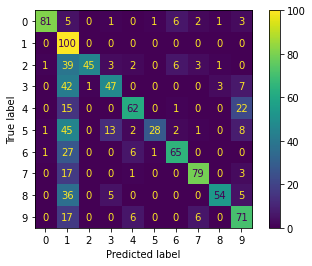

In [431]:
plot_confusion_matrix(neigh, x_test, y_test)  
plt.show()


In [432]:
# def predic(X_testing,X_träning,Y_träning):
#     neigh = KNeighborsClassifier(n_neighbors = k).fit(X_träning,Y_träning)
#     test= neigh.predict(X_testing)
#     return test

# print(predic(x_test,x_train,y_train))



# Väl Godkänt:


In [433]:

# def ED(x_1, x_2):  
#     return np.sqrt(np.sum((x_1- x_2) **2))   


# class KNN():

#     def __init__(self,k):
#         self.k = k
    
#     def fit(self,X,y):
#         self.X_träin = X 
#         self.y_träin = y


#     def predict(self,X):
#         y_pred = [self.predict_most_common(x) for x in X ]
#         return np.array(y_pred)
    
    

#     def accuracy (y_true,y_pred):
#         return np.sum(y_true == y_pred)/ len(y_true)


#     def predict_most_common(self,x):
        
#         avstånd = [ED(x, x_tr) for x_tr in self.X_träin]
#         k_index = np.argsort(avstånd)[:self.k]

#         k_neigbers_labels = [self.y_träin[c] for c in k_index]

#         most_commo = Counter(k_neigbers_labels).most_common(1)

#         return most_commo[0][0]

In [449]:
from k_neiber import KNN
k_nub_lista=[1,2,3,4,5,10,20,30,40,50,100,200]

for h in k_nub_lista:
    print(f'K värde är nu ***{h}***')
    cls = KNN(k = h)
  

K värde är nu ***1***
K värde är nu ***2***
K värde är nu ***3***
K värde är nu ***4***
K värde är nu ***5***
K värde är nu ***10***
K värde är nu ***20***
K värde är nu ***30***
K värde är nu ***40***
K värde är nu ***50***
K värde är nu ***100***
K värde är nu ***200***


In [434]:
from scipy import stats

class BruteForceKNN:
    """
    Methods:
    -------
    fit: Calculate distances and ranks based on given data
    predict: Predict the K nearest self.neighbors based on problem type
    """ 
  
    

    def __init__(self, k, problem: int=0, metric: int=0):
        """
            Parameters
            ----------
            k: Number of nearest self.neighbors
            problem: Type of learning
            0 = Regression, 1 = Classification
            metric: Distance metric to be used. 
            0 = Euclidean, 1 = Manhattan
        """
        self.k = k
        self.problem = problem
        self.metric = metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train


    
    

    # def accuracy (self,y_true,y_pred):
    #     return np.sum(y_true == y_pred)/ len(y_true)
    

    def predict(self, X_test):
        import numpy as np
        from scipy import stats

        m = self.X_train.shape[0]
        n = X_test.shape[0]
        y_pred = []

        # Calculating distances  
        for i in range(n):  # for every sample in X_test
            distance = []  # To store the distances
            for j in range(m):  # for every sample in X_train
                if self.metric == 0:
                    d = (np.sqrt(np.sum(np.square(X_test.iloc[i,:] - self.X_train.iloc[j,:]))))  # Euclidean distance
                else:
                    d = (np.absolute(X_test.iloc[i, :] - self.X_train.iloc[j,:]))  # Manhattan distance
                distance.append((d, y_train[j]))    
            distance = sorted(distance) # sorting distances in ascending order

            # Getting k nearest neighbors
            neighbors = []
            for item in range(self.k):
                neighbors.append(distance[item][1])  # appending K nearest neighbors

            # Making predictions
            if self.problem == 0:
                y_pred.append(np.mean(neighbors))  # For Regression
            else:
                y_pred.append(stats.mode(neighbors)[0][0])  # For Classification
        return y_pred


In [444]:
k_nub_lista=[1,2,3,4,5,10,20,30,40,50,100,200]

for h in k_nub_lista:
    print(f'K värde är nu ***{h}***')
    cls = BruteForceKNN(k = h)
    trän=cls.fit(x_train,y_train)

    preds= cls.predict(x_test)

    preds



K värde är nu ***1***


KeyboardInterrupt: 

In [437]:

test = r2_score(y_test,preds)
test

0.903996632996633